In [181]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
import plotly.express as px

In [52]:
import copy

In [2]:
df = pd.read_csv("./df_output4.csv")

In [4]:
df.drop(columns = 'durations', inplace=True)

In [5]:
df

,video_id,title,channelTitle,view_count,likes,comment_count,description,tags_list,category_title,remain_days,views,like,times,trending_day,uploaded,translations,tags_length
0,UmJiVIRmGxI,손석구에게 납치 시 행동요령에 대해 묻다,피식대학Psick Univ,2003876.0,47573.0,2919.0,피식쇼 조지아크래프트 손석구 피식대학Follow the host of PSICK S...,[],Comedy,13.0,"[2003876.0, 2325702.0, 2524614.0, 2652506.0, 2...","47573.0, 52883.0, 56009.0, 57798.0, 59058.0, 5...",2079.0,1.0,2023-08-30 09:00:07,"신사 숙녀 여러분 LK 99의 발명 후 가장 위대한 쇼입니다..오, 당신은 멋져 보...",2
1,881P3Vr5GQU,스우파2 2회 바다가 아예 안 보여 리더 계급의 피 튀기는 메인 댄서 선발전 스트릿...,The CHOOM (더 춤),1025631.0,18923.0,2088.0,티빙에서 스트리밍 스우파2 2회 바다가 아예 안 보여 리더 계급의 피 튀기는 메인 ...,"['Mnet', 'SWF2', 'StreetWomanFighter2', 'dance...",Entertainment,5.0,"[1025631.0, 1403948.0, 1720738.0, 1941611.0, 2...","18923.0, 23397.0, 26713.0, 28964.0, 30801.0",1192.0,1.0,2023-08-31 09:50:33,할로님 어떻게 짰을지 너무이 노래 완전 안무하는 기대된다 안무를 어떻게 표현했을지 ...,93
2,Ec0tKX99gbA,좋아하는 연예인이 고맙다고 나를 안아준다면 뷔 수고했어 오늘도 2023,딩고 스토리 / dingo story,2893689.0,281938.0,22281.0,촬영 날 뷔가 제작진에게 한 말 아미 만나서 놀아보는 게 버킷리스트였어요 슈스 V ...,"['딩고', 'dingo', 'dingostory', '비티에스', '방탄소년단',...",Entertainment,14.0,"[2893689.0, 3420266.0, 4048146.0, 4441726.0, 5...","281938.0, 311781.0, 360313.0, 384382.0, 419764...",840.0,1.0,2023-08-31 09:00:08,고마워 뷔가 고맙다고 나를 안아준다면 수고했어 오늘도 2023 수고했어 오늘도 20...,181
3,wYkGQYsXPjI,미국에서 상봉하자마자 오열하는 쿨 유리와 이지혜 여행vlog,밉지않은 관종언니,299472.0,7002.0,438.0,관심이들 까꿍 오늘은 미국 브이로그 마지막편입니다 ㅋㅋ마지막편 답게 정말 탈탈 털어...,"['이지혜', '밉지않은 관종언니', '밉관', '큰태리', '문재완', '이지혜 ...",People & Blogs,15.0,"[299472.0, 380436.0, 452024.0, 509066.0, 56262...","7002.0, 8064.0, 8996.0, 9574.0, 10081.0, 10221...",1536.0,1.0,2023-08-31 09:15:07,까꿍 샌프란시스코 아마 6일째인가요 나도 이제 헷갈리네 여기는 오늘 코스트코를 왔어...,604
4,HhH2BMHy5PM,탕후루 파트타이머,너덜트,1311714.0,37646.0,2891.0,코믹숏무비 너덜트 극한알바3시간씩 다른 알바를 해야하는 파트타이머 알바생들의 소서사...,"['너덜트', '유현규', '전상협', '임재형', '코믹숏무비', '스케치코미디'...",Comedy,16.0,"[1311714.0, 1786937.0, 2263856.0, 2514904.0, 2...","37646.0, 46399.0, 53507.0, 57034.0, 59048.0, 6...",237.0,1.0,2023-08-31 12:47:48,지금 몇 개나 갈래 블랙 상파이어야 벌써 준비한게 다 떨어졌어 곧 기사들이 도착할거...,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,kMuf-L3VgDQ,알타리김치 가장 맛있게 담그는 비법 공개합니다,김대석 셰프TV,105949.0,3934.0,186.0,김대석 셰프의 32년 노하우를 공개합니다 오늘은 초롱무김치 레시피를 알려 드리겠습니...,"['김대석', '김대석셰프', '김대석쉐프', '김대석셰프TV', '김대석쉐프TV'...",Howto & Style,10.0,"[105949.0, 200094.0, 241616.0, 273599.0, 30254...","3934.0, 5677.0, 6456.0, 7078.0, 7567.0, 7914.0...",777.0,21.0,2023-09-20 23:00:19,안녕하세요 김대석 셰프입니다 오늘은 추석에 먹으면 끝내주는 초록무김치 담아보려고 합...,535
453,I7K5TYPdI08,Q&A,Rena Hattori,196647.0,11852.0,1653.0,_ Rena OFFICIAL SNS 스우파2 TSUBAKILL Rena 레나 스트릿...,[],People & Blogs,6.0,"[196647.0, 272024.0, 501773.0, 513846.0, 52100...","11852.0, 14552.0, 22692.0, 23005.0, 23201.0, 2...",996.0,21.0,2023-09-20 11:00:11,안녕하세요 여러분 오늘은 무엇을 하시나요 오늘 질문 코너 오늘은 의 이야기에서 다른...,2
454,PBf6a6pth-c,역대급 쓰레기집 청소했습니다,배말랭,293275.0,5374.0,452.0,클린 말랭져스 출동이야 인스타그램 비즈니스 문의 배말랭 배씨표류기 베란다원룸 자취 생존,"['배말랭', '별다먹', '백수', '자취', '핫소스', '생존', '배씨표류기...",People & Blogs,10.0,"[293275.0, 332770.0, 359646.0, 383037.0, 40341...","5374.0, 5783.0, 6073.0, 6289.0, 6466.0, 6550.0...",476.0,21.0,2023-09-20 11:00:17,뭐야 누가 죽었어 시체성 없는 냄새가 존나 나 집에서 근데 심각하다 진짜 이거 뭐 ...,133
455,PtSS0lQif5w,어느 날 나에게 갑자기 찾아온 루게릭병,삐루빼로,386985.0,21221.0,1248.0,인스타그램 bbiru_unni 인스타그램 bbiru_knitting 문의 루게릭환자...,[],People & Blogs,10.0,"[386985.0, 446943.0, 510297.0, 635268.0, 72900...","21221.0, 22876.0, 24792.0, 26991.0, 28556.0, 2...",514.0,21.0,2023-09-20 09:54:01,여러분 안녕하세요 오늘은 저와 저희 엄마가 함께 보내는 일상을 조금 자세히 남겨 봤...,2


In [7]:
viewership = pd.DataFrame()
viewership_trending = pd.DataFrame()

In [16]:
df.loc[1, 'views'].split(',')[-1].strip()

'2132185.0]'

In [25]:
for i in range(len(df)):
    views = df.loc[i, 'views'].replace('[', '').replace(']', '').split(',')
    viewership_trending.loc[i, 'views'] = float(views[-1].replace(' ', ''))-float(views[0].replace(' ', ''))
    viewership.loc[i, 'views'] = float(views[-1])

In [26]:
viewership

,views
0,3035449.0
1,2132185.0
2,5567143.0
3,641662.0
4,3059632.0
...,...
452,357086.0
453,529224.0
454,425026.0
455,864484.0


In [27]:
viewership_trending

,views
0,1031573.0
1,1106554.0
2,2673454.0
3,342190.0
4,1747918.0
...,...
452,251137.0
453,332577.0
454,131751.0
455,477499.0


<Axes: xlabel='times', ylabel='views'>

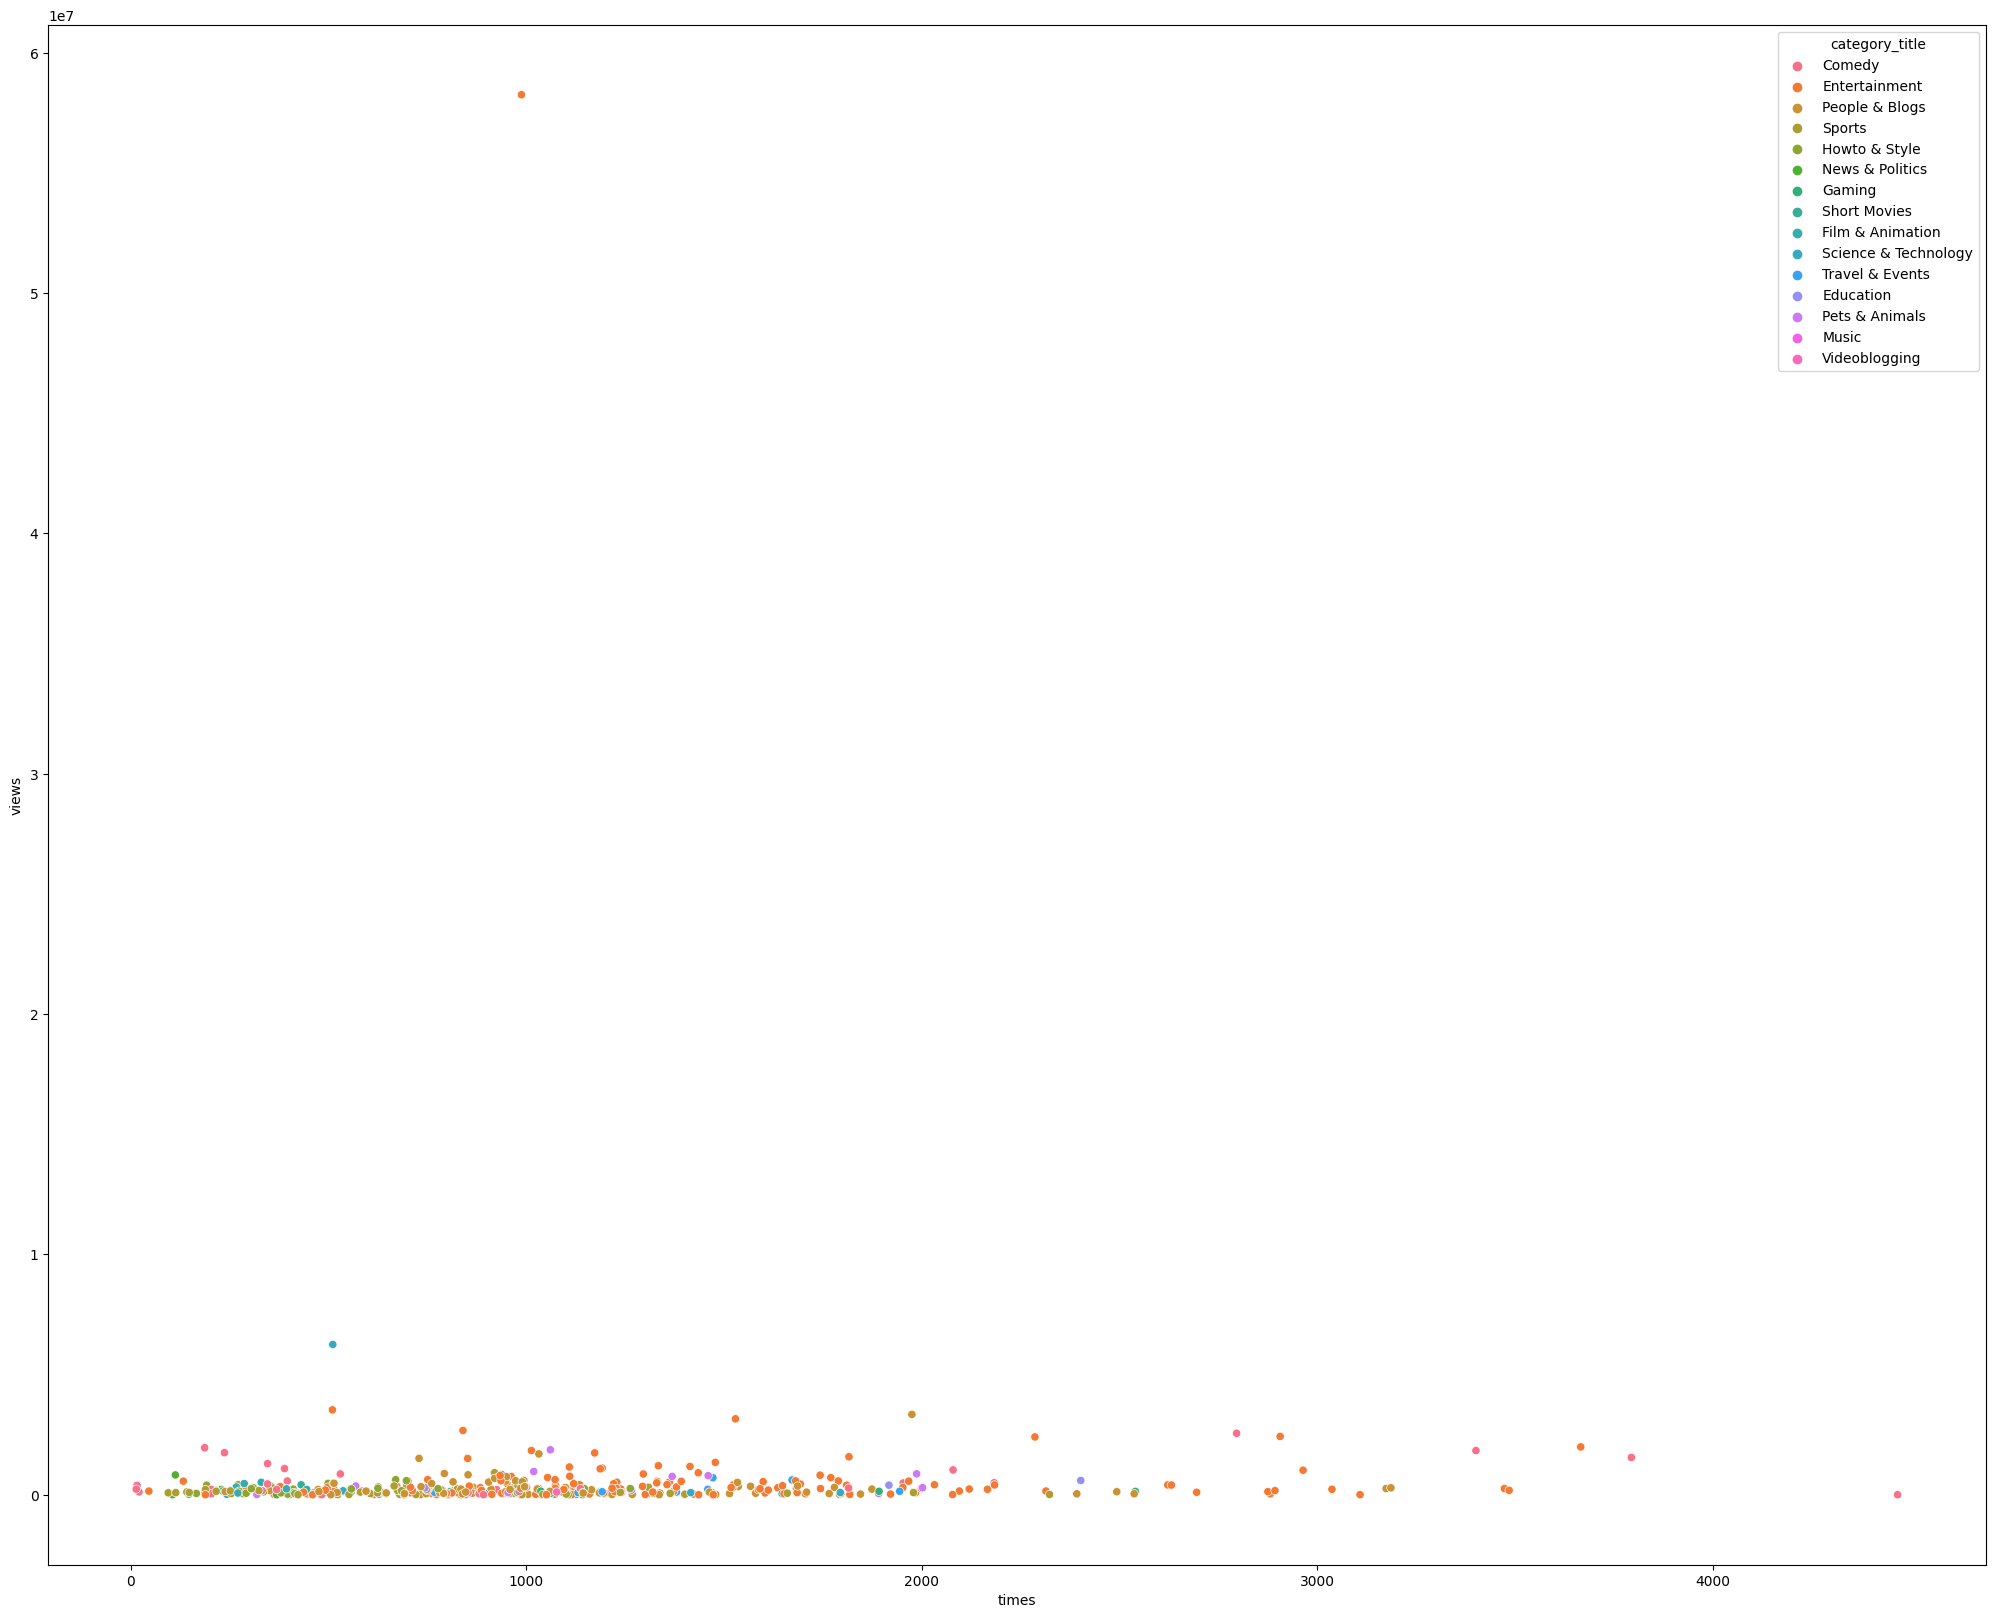

In [30]:
plt.figure(figsize=(25, 20))
sns.scatterplot(y = viewership_trending['views'], x=df['times'], hue=df['category_title'])

<Axes: xlabel='times', ylabel='views'>

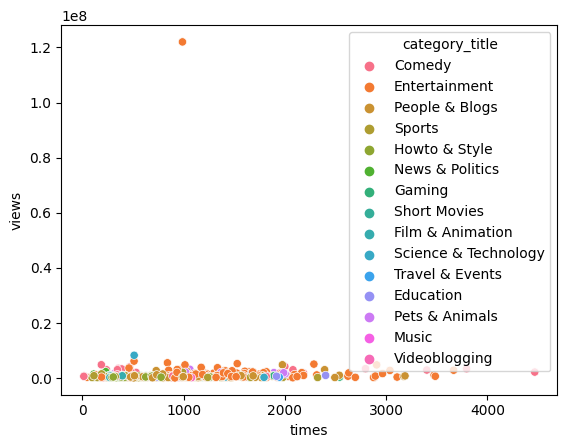

In [32]:
sns.scatterplot(y = viewership['views'], x=df['times'], hue=df['category_title'])

In [290]:
px.scatter(y= viewership['views'], x=df['times'], color=df['category_title'])

In [291]:
px.scatter(y= viewership_trending['views'], x=df['times'], color=df['category_title'])

In [47]:
likes = pd.DataFrame()
likes_trending = pd.DataFrame()

for i in range(len(df)):
    like = df.loc[i, 'like'].replace('[', '').replace(']', '').split(',')
    likes_trending.loc[i, 'like'] = float(like[-1].replace(' ', ''))-float(like[0].replace(' ', ''))
    likes.loc[i, 'like'] = float(like[-1])

In [48]:
likes

,like
0,63564.0
1,30801.0
2,443639.0
3,11066.0
4,65195.0
...,...
452,8481.0
453,23430.0
454,6659.0
455,30740.0


In [61]:
like_adj = copy.deepcopy(likes_trending)

In [62]:
viewership_trending_adj = copy.deepcopy(viewership_trending)

In [63]:
for i in range(len(df)):
    like_adj.loc[i, 'like'] = like_adj.loc[i, 'like']/df.loc[i, 'remain_days']
    viewership_trending_adj.loc[i, 'views'] = viewership_trending_adj.loc[i, 'views']/df.loc[i, 'remain_days']

In [223]:
px.scatter(y= likes_trending['like'], x=df['times'], color=df['category_title'])

In [51]:
px.scatter(y= likes['like'], x=df['times'], color=df['category_title'])

In [59]:
px.scatter(y= like_adj['like'], x=df['times'], color=df['category_title'])

In [65]:
px.scatter(y= viewership_trending_adj['views'], x=df['times'], color=df['category_title'])

In [66]:
df

,video_id,title,channelTitle,view_count,likes,comment_count,description,tags_list,category_title,remain_days,views,like,times,trending_day,uploaded,translations,tags_length
0,UmJiVIRmGxI,손석구에게 납치 시 행동요령에 대해 묻다,피식대학Psick Univ,2003876.0,47573.0,2919.0,피식쇼 조지아크래프트 손석구 피식대학Follow the host of PSICK S...,[],Comedy,13.0,"[2003876.0, 2325702.0, 2524614.0, 2652506.0, 2...","47573.0, 52883.0, 56009.0, 57798.0, 59058.0, 5...",2079.0,1.0,2023-08-30 09:00:07,"신사 숙녀 여러분 LK 99의 발명 후 가장 위대한 쇼입니다..오, 당신은 멋져 보...",2
1,881P3Vr5GQU,스우파2 2회 바다가 아예 안 보여 리더 계급의 피 튀기는 메인 댄서 선발전 스트릿...,The CHOOM (더 춤),1025631.0,18923.0,2088.0,티빙에서 스트리밍 스우파2 2회 바다가 아예 안 보여 리더 계급의 피 튀기는 메인 ...,"['Mnet', 'SWF2', 'StreetWomanFighter2', 'dance...",Entertainment,5.0,"[1025631.0, 1403948.0, 1720738.0, 1941611.0, 2...","18923.0, 23397.0, 26713.0, 28964.0, 30801.0",1192.0,1.0,2023-08-31 09:50:33,할로님 어떻게 짰을지 너무이 노래 완전 안무하는 기대된다 안무를 어떻게 표현했을지 ...,93
2,Ec0tKX99gbA,좋아하는 연예인이 고맙다고 나를 안아준다면 뷔 수고했어 오늘도 2023,딩고 스토리 / dingo story,2893689.0,281938.0,22281.0,촬영 날 뷔가 제작진에게 한 말 아미 만나서 놀아보는 게 버킷리스트였어요 슈스 V ...,"['딩고', 'dingo', 'dingostory', '비티에스', '방탄소년단',...",Entertainment,14.0,"[2893689.0, 3420266.0, 4048146.0, 4441726.0, 5...","281938.0, 311781.0, 360313.0, 384382.0, 419764...",840.0,1.0,2023-08-31 09:00:08,고마워 뷔가 고맙다고 나를 안아준다면 수고했어 오늘도 2023 수고했어 오늘도 20...,181
3,wYkGQYsXPjI,미국에서 상봉하자마자 오열하는 쿨 유리와 이지혜 여행vlog,밉지않은 관종언니,299472.0,7002.0,438.0,관심이들 까꿍 오늘은 미국 브이로그 마지막편입니다 ㅋㅋ마지막편 답게 정말 탈탈 털어...,"['이지혜', '밉지않은 관종언니', '밉관', '큰태리', '문재완', '이지혜 ...",People & Blogs,15.0,"[299472.0, 380436.0, 452024.0, 509066.0, 56262...","7002.0, 8064.0, 8996.0, 9574.0, 10081.0, 10221...",1536.0,1.0,2023-08-31 09:15:07,까꿍 샌프란시스코 아마 6일째인가요 나도 이제 헷갈리네 여기는 오늘 코스트코를 왔어...,604
4,HhH2BMHy5PM,탕후루 파트타이머,너덜트,1311714.0,37646.0,2891.0,코믹숏무비 너덜트 극한알바3시간씩 다른 알바를 해야하는 파트타이머 알바생들의 소서사...,"['너덜트', '유현규', '전상협', '임재형', '코믹숏무비', '스케치코미디'...",Comedy,16.0,"[1311714.0, 1786937.0, 2263856.0, 2514904.0, 2...","37646.0, 46399.0, 53507.0, 57034.0, 59048.0, 6...",237.0,1.0,2023-08-31 12:47:48,지금 몇 개나 갈래 블랙 상파이어야 벌써 준비한게 다 떨어졌어 곧 기사들이 도착할거...,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,kMuf-L3VgDQ,알타리김치 가장 맛있게 담그는 비법 공개합니다,김대석 셰프TV,105949.0,3934.0,186.0,김대석 셰프의 32년 노하우를 공개합니다 오늘은 초롱무김치 레시피를 알려 드리겠습니...,"['김대석', '김대석셰프', '김대석쉐프', '김대석셰프TV', '김대석쉐프TV'...",Howto & Style,10.0,"[105949.0, 200094.0, 241616.0, 273599.0, 30254...","3934.0, 5677.0, 6456.0, 7078.0, 7567.0, 7914.0...",777.0,21.0,2023-09-20 23:00:19,안녕하세요 김대석 셰프입니다 오늘은 추석에 먹으면 끝내주는 초록무김치 담아보려고 합...,535
453,I7K5TYPdI08,Q&A,Rena Hattori,196647.0,11852.0,1653.0,_ Rena OFFICIAL SNS 스우파2 TSUBAKILL Rena 레나 스트릿...,[],People & Blogs,6.0,"[196647.0, 272024.0, 501773.0, 513846.0, 52100...","11852.0, 14552.0, 22692.0, 23005.0, 23201.0, 2...",996.0,21.0,2023-09-20 11:00:11,안녕하세요 여러분 오늘은 무엇을 하시나요 오늘 질문 코너 오늘은 의 이야기에서 다른...,2
454,PBf6a6pth-c,역대급 쓰레기집 청소했습니다,배말랭,293275.0,5374.0,452.0,클린 말랭져스 출동이야 인스타그램 비즈니스 문의 배말랭 배씨표류기 베란다원룸 자취 생존,"['배말랭', '별다먹', '백수', '자취', '핫소스', '생존', '배씨표류기...",People & Blogs,10.0,"[293275.0, 332770.0, 359646.0, 383037.0, 40341...","5374.0, 5783.0, 6073.0, 6289.0, 6466.0, 6550.0...",476.0,21.0,2023-09-20 11:00:17,뭐야 누가 죽었어 시체성 없는 냄새가 존나 나 집에서 근데 심각하다 진짜 이거 뭐 ...,133
455,PtSS0lQif5w,어느 날 나에게 갑자기 찾아온 루게릭병,삐루빼로,386985.0,21221.0,1248.0,인스타그램 bbiru_unni 인스타그램 bbiru_knitting 문의 루게릭환자...,[],People & Blogs,10.0,"[386985.0, 446943.0, 510297.0, 635268.0, 72900...","21221.0, 22876.0, 24792.0, 26991.0, 28556.0, 2...",514.0,21.0,2023-09-20 09:54:01,여러분 안녕하세요 오늘은 저와 저희 엄마가 함께 보내는 일상을 조금 자세히 남겨 봤...,2


In [76]:
mms = MinMaxScaler()

In [96]:
like_list = pd.DataFrame(index = df.index)

In [97]:
for i in range(len(df)):
    likes = df.loc[i, 'like'].replace('[', '').replace(']', '').split(',')
    
    min_likes = float(likes[0])
    max_likes = float(likes[-1])
    
    denom = max_likes - min_likes
    for j in range(len(likes)):
        if denom != 0:
            like_list.loc[i, j] = (float(likes[j])-min_likes)/denom
        
        else:
            like_list.loc[i, j] = 1
    

In [98]:
like_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.332062,0.527547,0.639422,0.718216,0.768120,0.815959,0.848852,0.908511,0.934963,0.956100,0.982177,1.000000,NaN,NaN,NaN,NaN
1,0.0,0.376663,0.655834,0.845344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.184557,0.484691,0.633540,0.852351,0.895282,0.942839,0.957644,0.969190,0.978244,0.983816,0.989116,0.995838,1.000000,NaN,NaN,NaN
3,0.0,0.261319,0.490650,0.632874,0.757628,0.792077,0.836614,0.895669,0.916831,0.933563,0.951772,0.966535,0.974902,0.986959,1.000000,NaN,NaN
4,0.0,0.317725,0.575738,0.703764,0.776870,0.826564,0.860830,0.884678,0.924897,0.937094,0.948492,0.961451,0.969981,0.979999,0.990671,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.0,0.383330,0.554651,0.691445,0.798988,0.875302,0.921707,0.948757,0.965912,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,0.0,0.233201,0.936258,0.963292,0.980221,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,0.0,0.318288,0.543969,0.712062,0.849805,0.915175,0.943191,0.963424,0.982101,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,0.0,0.173863,0.375144,0.606156,0.770564,0.868474,0.930770,0.964177,0.986763,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
like_list['category'] = df['category_title'].copy()

In [100]:
like_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,category
0,0.0,0.332062,0.527547,0.639422,0.718216,0.768120,0.815959,0.848852,0.908511,0.934963,0.956100,0.982177,1.000000,NaN,NaN,NaN,NaN,Comedy
1,0.0,0.376663,0.655834,0.845344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entertainment
2,0.0,0.184557,0.484691,0.633540,0.852351,0.895282,0.942839,0.957644,0.969190,0.978244,0.983816,0.989116,0.995838,1.000000,NaN,NaN,NaN,Entertainment
3,0.0,0.261319,0.490650,0.632874,0.757628,0.792077,0.836614,0.895669,0.916831,0.933563,0.951772,0.966535,0.974902,0.986959,1.000000,NaN,NaN,People & Blogs
4,0.0,0.317725,0.575738,0.703764,0.776870,0.826564,0.860830,0.884678,0.924897,0.937094,0.948492,0.961451,0.969981,0.979999,0.990671,1.0,NaN,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.0,0.383330,0.554651,0.691445,0.798988,0.875302,0.921707,0.948757,0.965912,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Howto & Style
453,0.0,0.233201,0.936258,0.963292,0.980221,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs
454,0.0,0.318288,0.543969,0.712062,0.849805,0.915175,0.943191,0.963424,0.982101,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs
455,0.0,0.173863,0.375144,0.606156,0.770564,0.868474,0.930770,0.964177,0.986763,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs


In [101]:
likes_comedy = like_list[like_list['category']=='Comedy']

In [225]:
likes_comedy

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,category
0,0.0,0.332062,0.527547,0.639422,0.718216,0.768120,0.815959,0.848852,0.908511,0.934963,0.956100,0.982177,1.000000,NaN,NaN,NaN,NaN,Comedy
4,0.0,0.317725,0.575738,0.703764,0.776870,0.826564,0.860830,0.884678,0.924897,0.937094,0.948492,0.961451,0.969981,0.979999,0.990671,1.0,NaN,Comedy
7,0.0,0.240319,0.731537,0.788623,0.839920,0.920559,0.954890,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
13,0.0,0.506271,0.620462,0.687129,0.747195,0.782838,0.854785,0.891749,0.929373,0.970957,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
15,0.0,0.744788,0.837452,0.899614,0.934363,0.955985,0.986873,0.991892,0.996911,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
45,0.0,0.274125,0.439795,0.521776,0.633646,0.705380,0.772844,0.845431,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
55,0.0,0.181818,0.392461,0.516630,0.598670,0.680710,0.764967,0.833703,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
59,0.0,0.284124,0.437859,0.547414,0.642241,0.713003,0.767601,0.829382,0.963721,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
84,0.0,0.194043,0.399143,0.582807,0.749774,0.885605,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy
129,0.0,0.626140,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Comedy


In [196]:
def trimmed_mean(df, trim_p):
    means = []
    trim_p = trim_p/100
    for i in range(len(df.columns)-1):

        val_list = list(df[i][df[i].notnull()].sort_values())
        n = len(val_list)
        trim_c = int(np.floor(n*trim_p))
        
        trimmed = val_list[trim_c:n-trim_c]
        if len(trimmed) > 0:
            trimmed_mean = sum(trimmed)/len(trimmed)
        
            means.append(trimmed_mean)
        else:
            means.append(trimmed)
            
    while not means[-1]:
        means.pop()
    return means

In [253]:
comedy_likes = trimmed_mean(likes_comedy, 10)

In [198]:
comedy_likes

[0.0,
 0.3747119795703931,
 0.5917634683494779,
 0.6675580654528447,
 0.7373711334603436,
 0.799947192913952,
 0.8544481928368525,
 0.8900800485559962,
 0.9280635210703704,
 0.9364153242017728,
 0.9361696850354123,
 0.959854197069394,
 0.976225190860383,
 0.9730002235238143,
 0.9885718515881521,
 1.0]

In [254]:
comedy_likes

[0.0,
 0.3747119795703931,
 0.5917634683494779,
 0.6675580654528447,
 0.7373711334603436,
 0.799947192913952,
 0.8544481928368525,
 0.8900800485559962,
 0.9280635210703704,
 0.9364153242017728,
 0.9361696850354123,
 0.959854197069394,
 0.976225190860383,
 0.9730002235238143,
 0.9885718515881521,
 1.0]

Text(0.5, 0, 'days')

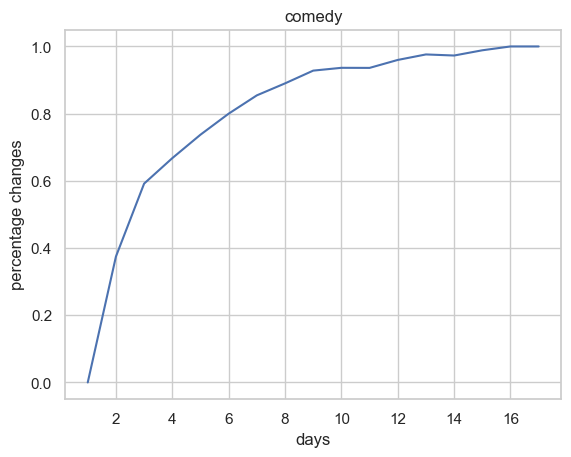

In [190]:
sns.set(style='whitegrid')
sns.lineplot(y = comedy_likes, x = range(1, len(comedy_likes)+1))
plt.title('comedy')
plt.ylabel('percentage changes')
plt.xlabel('days')

In [160]:
like_ent = like_list[like_list['category']=='Entertainment']

In [161]:
like_ent

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,category
1,0.0,0.376663,0.655834,0.845344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entertainment
2,0.0,0.184557,0.484691,0.633540,0.852351,0.895282,0.942839,0.957644,0.969190,0.978244,0.983816,0.989116,0.995838,1.00000,NaN,NaN,NaN,Entertainment
8,0.0,0.314045,0.545502,0.644924,0.757496,0.788006,0.812730,0.875329,0.887954,0.904787,0.922672,0.936875,0.956865,0.97738,1.0,NaN,NaN,Entertainment
9,0.0,0.350916,0.696280,0.761244,0.812326,0.860633,0.913937,0.957246,0.966685,0.975569,0.984453,1.000000,NaN,NaN,NaN,NaN,NaN,Entertainment
11,0.0,0.194825,0.356469,0.590868,0.679756,0.747336,0.802131,0.888584,0.916895,0.944597,0.977169,1.000000,NaN,NaN,NaN,NaN,NaN,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.0,0.176101,0.567556,0.679245,0.734982,0.783561,0.839731,0.891997,0.930818,0.962915,0.983301,1.000000,NaN,NaN,NaN,NaN,NaN,Entertainment
441,0.0,0.188512,0.401567,0.498695,0.591123,0.690862,0.768146,0.827676,0.872585,0.915927,0.950392,0.970235,1.000000,NaN,NaN,NaN,NaN,Entertainment
443,0.0,0.740741,0.809706,0.883780,0.936143,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entertainment
447,0.0,0.228017,0.841322,0.906140,0.949854,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entertainment


In [162]:
ent_like = trimmed_mean(like_ent, 5)

In [163]:
ent_like

[0.0,
 0.3600197031088517,
 0.5829507237456277,
 0.6912247917798189,
 0.7685222215838737,
 0.833003870837516,
 0.8758522392793199,
 0.9075454242419627,
 0.932460174417118,
 0.9473954813964601,
 0.9577438167350002,
 0.9756857630638923,
 0.9813526485425569,
 0.9824262716136045,
 0.9899036072561274,
 0.99480501474787,
 1.0]

Text(0.5, 0, 'days')

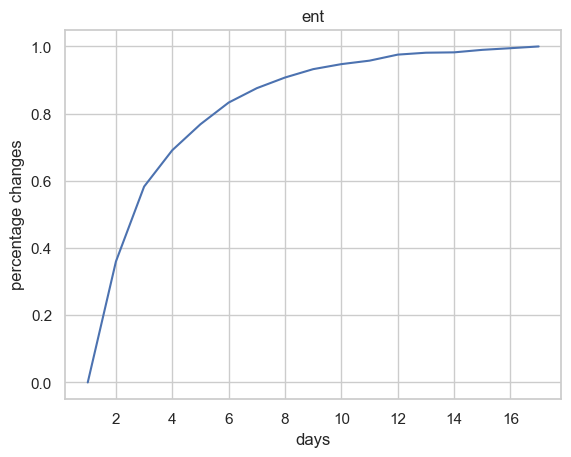

In [191]:
sns.lineplot(y = ent_like, x = range(1, len(ent_like)+1))
matplotlib.pyplot.title('ent')
plt.ylabel('percentage changes')
plt.xlabel('days')

In [199]:
like_edu = like_list[like_list['category']=='Education']

In [200]:
edu_like = trimmed_mean(like_edu, 5)

Text(0.5, 0, 'days')

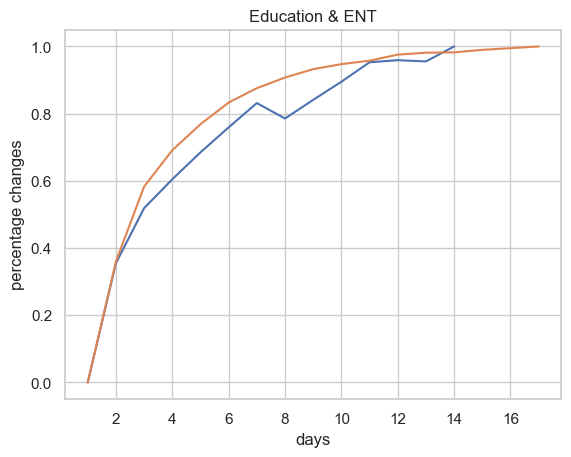

In [226]:
sns.lineplot(y = edu_like, x = range(1, len(edu_like)+1))
sns.lineplot(y = ent_like, x = range(1, len(ent_like)+1))

matplotlib.pyplot.title('Education & ENT')
plt.ylabel('percentage changes')
plt.xlabel('days')

In [195]:
edu_like

[0.0,
 0.3549324355056763,
 0.5187288022201264,
 0.6047211350927985,
 0.6848016568428423,
 0.7591864362336975,
 0.8315337313210117,
 0.785517004183331,
 0.8410931880987235,
 0.8950166409056207,
 0.9529205614214308,
 0.9591473834926794,
 0.9553831231813773,
 1.0,
 [],
 [],
 1.0]

In [218]:
def median_calc(df):
    medians = []
    for i in range(len(df.columns)-1):

        val_list = df[i][df[i].notnull()]

        medians.append(val_list.median())
            
    while not medians[-1]:
        medians.pop()
        
    while medians[-1] != 1:
        medians.pop()
    
    return medians

In [219]:
median_calc(like_edu)

[0.0,
 0.26601586333129956,
 0.44182716733638167,
 0.5657439446366782,
 0.7102167182662539,
 0.7526315789473684,
 0.7938080495356037,
 0.7865687497113297,
 0.8213477437531753,
 0.8993288590604027,
 0.974922600619195,
 0.9591473834926794,
 0.9553831231813773,
 1.0]

<Axes: >

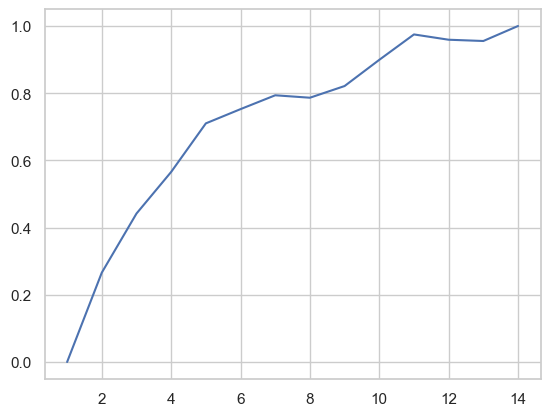

In [221]:
sns.lineplot(y = median_calc(like_edu), x = range(1, len(median_calc(like_edu))+1))

<Axes: >

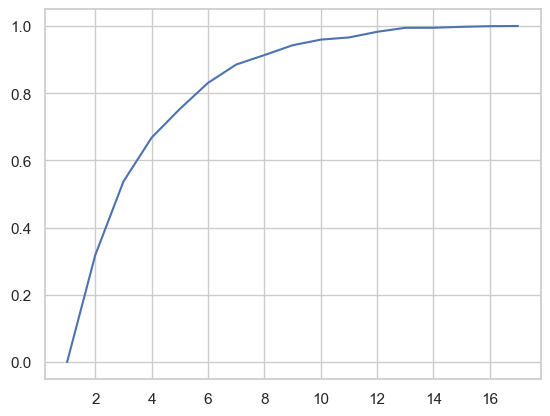

In [222]:
sns.lineplot(y = median_calc(like_ent), x = range(1, len(median_calc(like_ent))+1))

In [228]:
like_list['category'].unique()

array(['Comedy', 'Entertainment', 'People & Blogs', 'Sports',
       'Howto & Style', 'News & Politics', 'Gaming', 'Short Movies',
       'Film & Animation', 'Science & Technology', 'Travel & Events',
       'Education', 'Pets & Animals', 'Music', 'Videoblogging'],
      dtype=object)

In [ ]:
edu, ent, comedy,

In [234]:
like_blg = like_list[like_list['category']=="People & Blogs"]

In [235]:
like_blg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,category
3,0.0,0.261319,0.490650,0.632874,0.757628,0.792077,0.836614,0.895669,0.916831,0.933563,0.951772,0.966535,0.974902,0.986959,1.0,NaN,NaN,People & Blogs
10,0.0,0.177560,0.421524,0.547252,0.707535,0.773730,0.827435,0.913405,0.935054,0.954621,0.970233,0.977935,0.984596,0.991465,1.0,NaN,NaN,People & Blogs
17,0.0,0.318012,0.562319,0.691925,0.776398,0.831884,0.860870,0.888613,0.951139,0.965631,0.981781,0.992133,1.000000,NaN,NaN,NaN,NaN,People & Blogs
19,0.0,0.454810,0.660058,0.777843,0.857726,0.892711,0.910787,0.930612,0.960933,0.974344,0.988921,1.000000,NaN,NaN,NaN,NaN,NaN,People & Blogs
31,0.0,0.205898,0.336116,0.414171,0.508464,0.583684,0.650249,0.707315,0.860360,0.906473,0.942704,0.976408,1.000000,NaN,NaN,NaN,NaN,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,0.235873,0.458413,0.618413,0.832381,0.913651,0.956825,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs
451,0.0,0.137474,0.298518,0.481157,0.636838,0.739450,0.814255,0.881440,0.946789,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs
453,0.0,0.233201,0.936258,0.963292,0.980221,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs
454,0.0,0.318288,0.543969,0.712062,0.849805,0.915175,0.943191,0.963424,0.982101,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs


In [236]:
like_list

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,category
0,0.0,0.332062,0.527547,0.639422,0.718216,0.768120,0.815959,0.848852,0.908511,0.934963,0.956100,0.982177,1.000000,NaN,NaN,NaN,NaN,Comedy
1,0.0,0.376663,0.655834,0.845344,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Entertainment
2,0.0,0.184557,0.484691,0.633540,0.852351,0.895282,0.942839,0.957644,0.969190,0.978244,0.983816,0.989116,0.995838,1.000000,NaN,NaN,NaN,Entertainment
3,0.0,0.261319,0.490650,0.632874,0.757628,0.792077,0.836614,0.895669,0.916831,0.933563,0.951772,0.966535,0.974902,0.986959,1.000000,NaN,NaN,People & Blogs
4,0.0,0.317725,0.575738,0.703764,0.776870,0.826564,0.860830,0.884678,0.924897,0.937094,0.948492,0.961451,0.969981,0.979999,0.990671,1.0,NaN,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.0,0.383330,0.554651,0.691445,0.798988,0.875302,0.921707,0.948757,0.965912,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Howto & Style
453,0.0,0.233201,0.936258,0.963292,0.980221,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs
454,0.0,0.318288,0.543969,0.712062,0.849805,0.915175,0.943191,0.963424,0.982101,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs
455,0.0,0.173863,0.375144,0.606156,0.770564,0.868474,0.930770,0.964177,0.986763,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,People & Blogs


In [240]:
blog_like = trimmed_mean(like_blg, 10)

<Axes: >

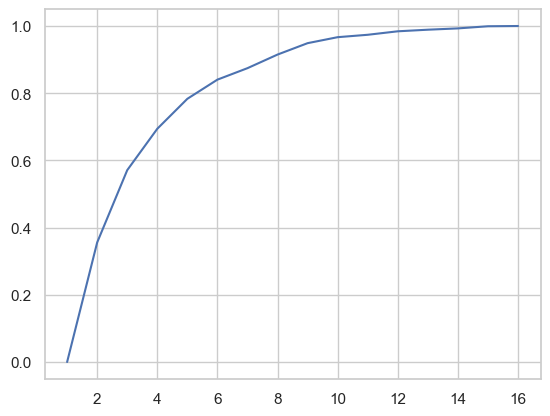

In [256]:
sns.lineplot(y = blog_like, x=range(1, len(blog_like)+1))


<Axes: >

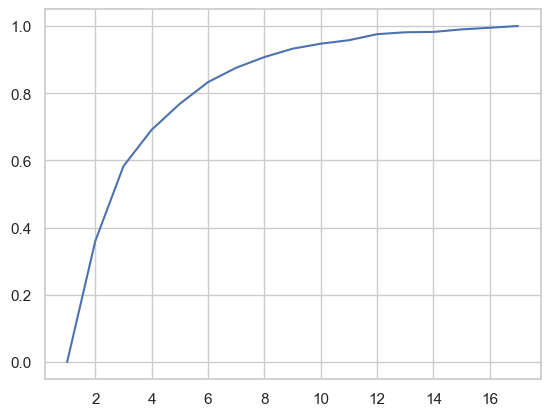

In [257]:
sns.lineplot(y = ent_like, x = range(1, len(ent_like)+1))


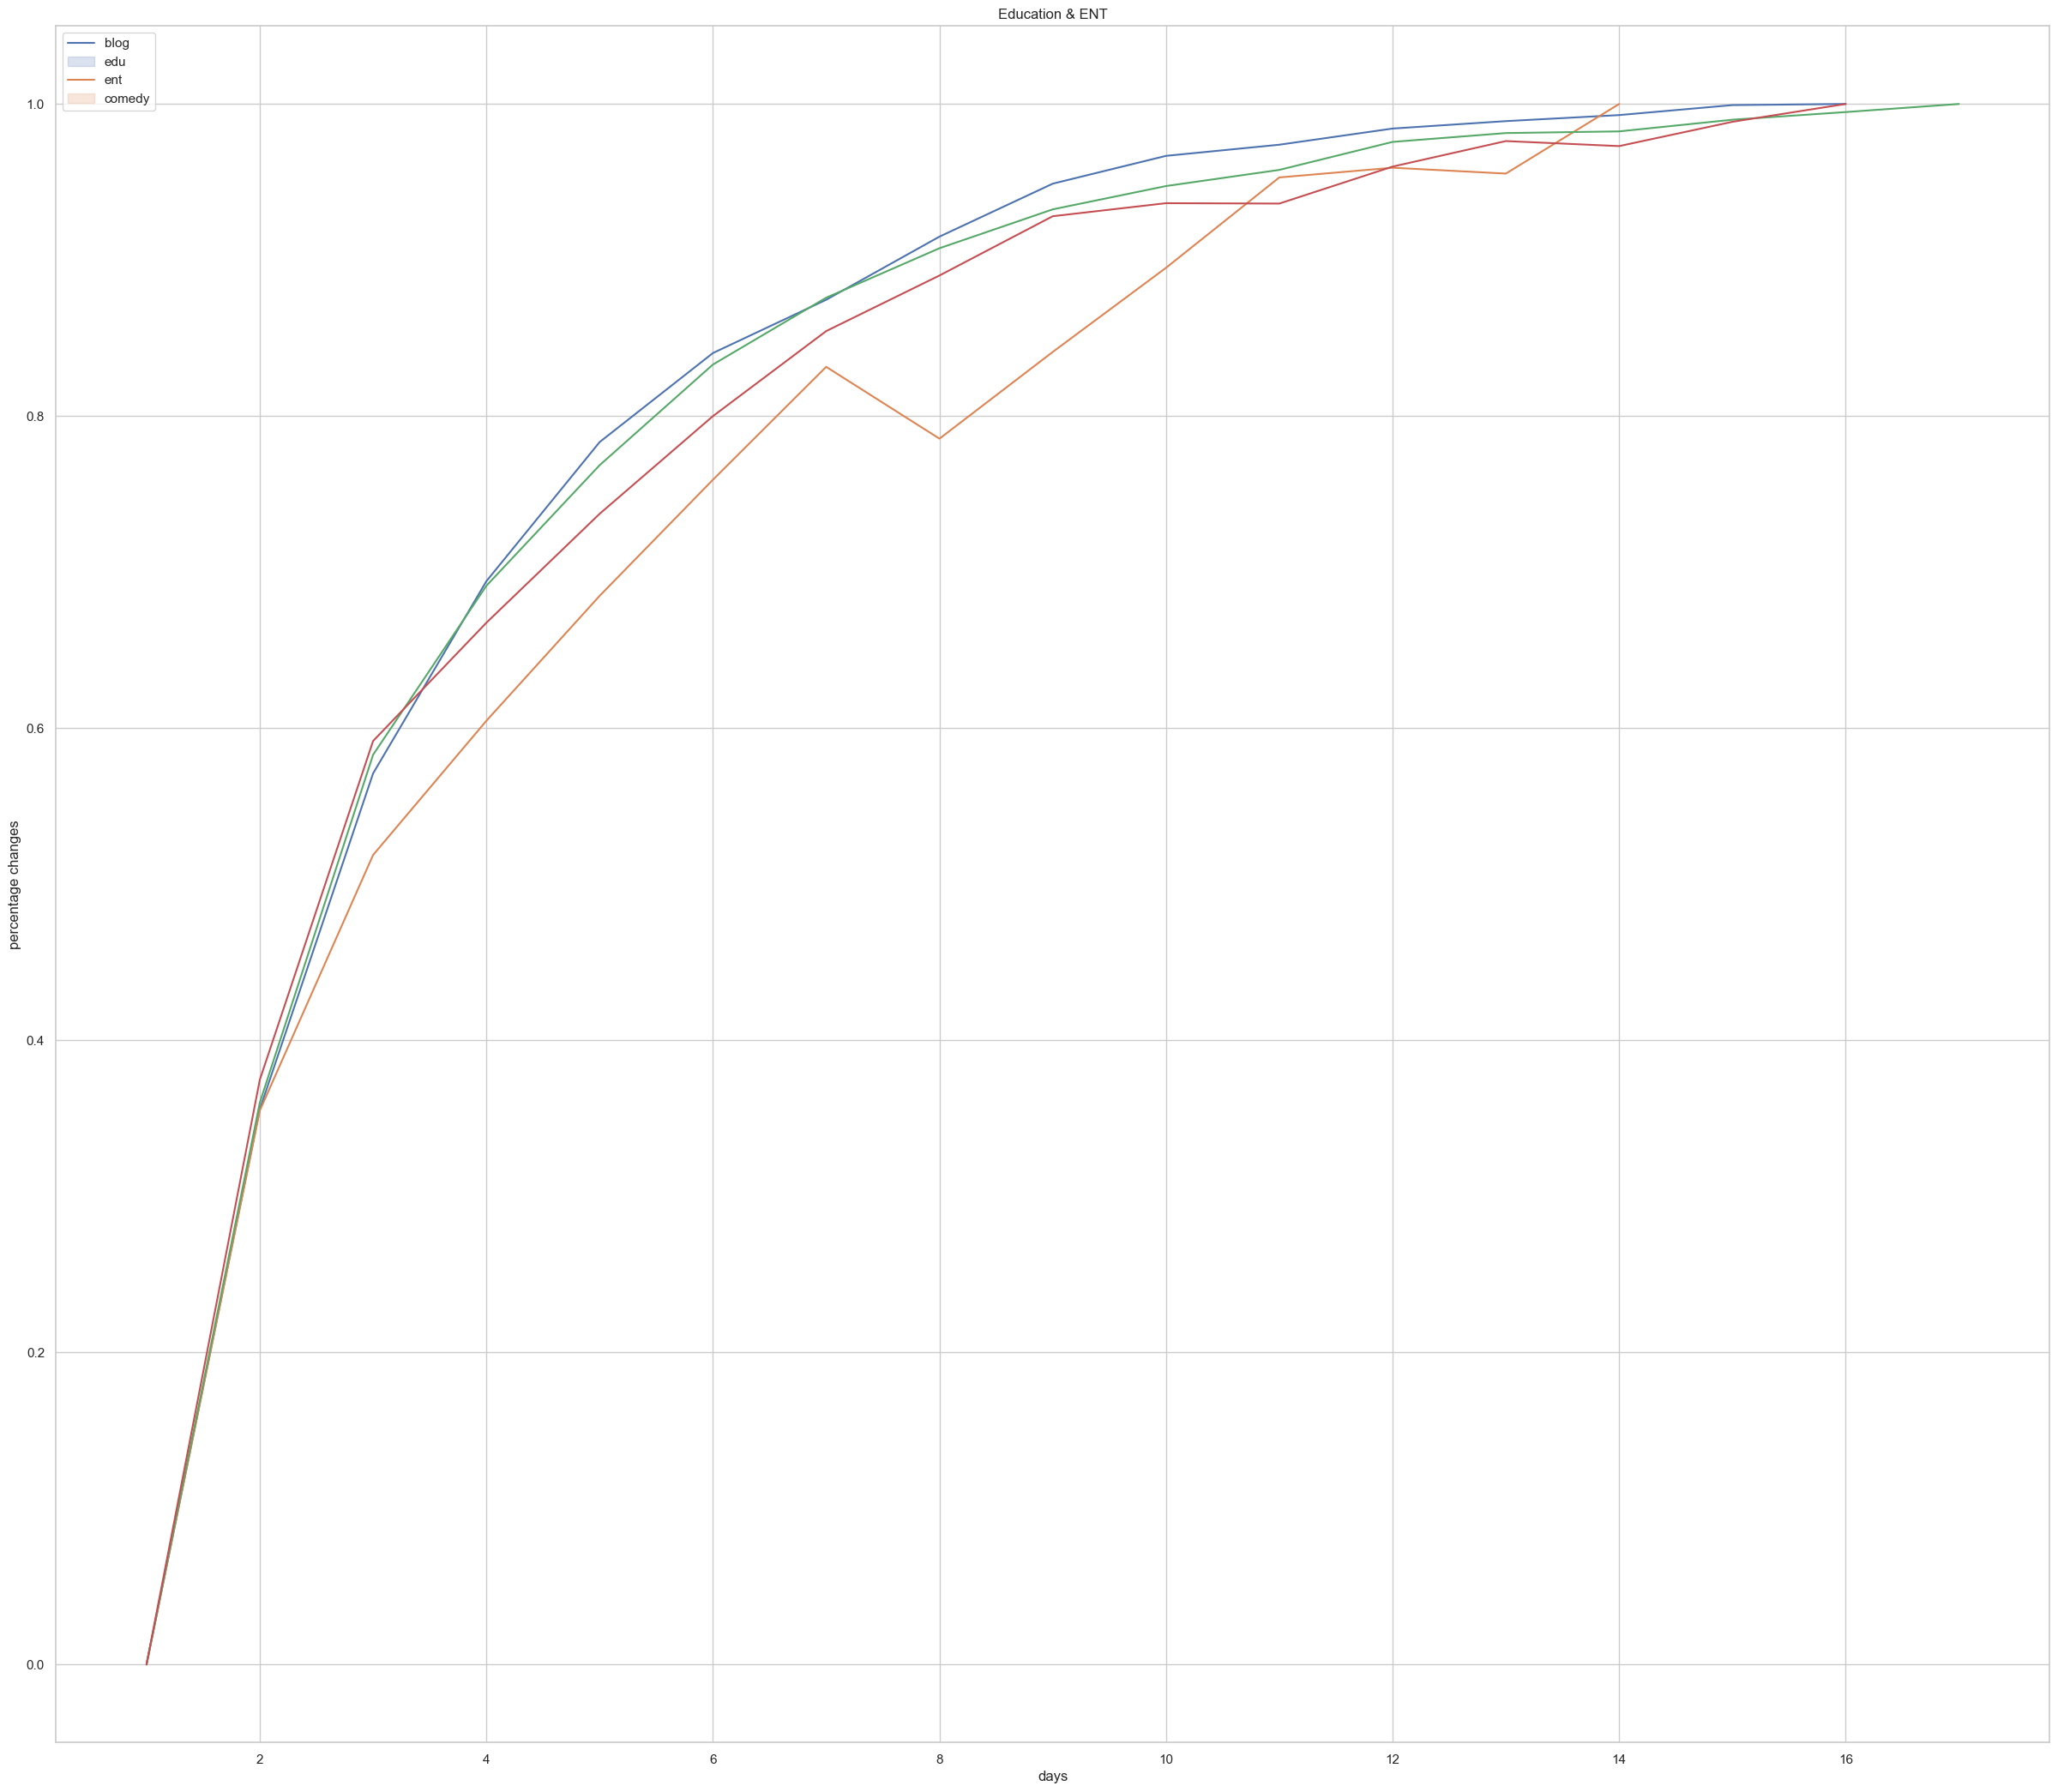

In [258]:
plt.figure(figsize=(30, 26))

sns.lineplot(y = blog_like, x=range(1, len(blog_like)+1))
sns.lineplot(y = edu_like, x = range(1, len(edu_like)+1))
sns.lineplot(y = ent_like, x = range(1, len(ent_like)+1))
sns.lineplot(y = comedy_likes, x = range(1, len(comedy_likes)+1))


matplotlib.pyplot.title('Education & ENT')
plt.ylabel('percentage changes')
plt.xlabel('days')
plt.legend(['blog', 'edu', 'ent', 'comedy'])


In [274]:
titles = pd.read_csv("./title_vectorized.csv")

In [276]:
titles.drop(columns = ['Unnamed: 0'], inplace=True)

In [277]:
titles

,손,납치,시,행동,요령,대해,묻다,스,우파,바다,...,캘,양,아름다,사간다는,대리석,채광,극한,골라,듄,다큐
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
df_desc = pd.read_csv("./descriptions_vct.csv")

In [333]:
df_desc.drop(columns = ['Unnamed: 0'], inplace=True)

In [334]:
df_desc.sum().sort_values(ascending=False).head(50)

놓고          26.0
대리석         18.0
베이글         18.0
입질          16.0
추억          15.0
썰고          15.0
T           14.0
이요          12.0
iPhone      10.0
AGU         10.0
가지           9.0
theK         9.0
인질           9.0
휴먼           9.0
작업           8.0
Official     8.0
국자           8.0
몰아           8.0
부어           8.0
경하           8.0
신라면          8.0
채석           8.0
부추           7.0
야쿠르트         7.0
뷔            7.0
자식           7.0
Kids         7.0
유현           7.0
소도           7.0
액젓           7.0
잘라           7.0
디제이          7.0
가공           7.0
젤            7.0
미샤           7.0
윤정           6.0
당            6.0
규            6.0
주방           6.0
불닭           6.0
호떡           6.0
레드           6.0
대엽           6.0
GO           6.0
채령           6.0
런던           6.0
역            6.0
아미           6.0
Pro          6.0
애플           6.0
dtype: float64

In [335]:
df_desc

,쇼,조지아,크래프트,손,대학,Follow,the,host,of,PSICK,...,까다로운,좁은,땀,범벅,골라,듄,다큐,생산,건설,korea
0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
import sklearn
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [353]:
cos_sim = cosine_similarity(df_desc.T)

In [354]:
cos_sim = pd.DataFrame(cos_sim)

In [357]:
cos_sim.sum().sort_values().unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  34.,
        35.,  36.,  37.,  39.,  40.,  41.,  42.,  44.,  45.,  46.,  47.,
        49.,  50.,  52.,  54.,  55.,  56.,  58.,  60.,  64.,  65.,  66.,
        67.,  71.,  72.,  74.,  75.,  81.,  86.,  87.,  88.,  89.,  93.,
        99., 109., 111., 117., 126., 157., 171., 209.])

In [339]:
cos_sim = linear_kernel(df_desc)

cos_sim = pd.DataFrame(cos_sim)

In [340]:
cos_sim

,0,1,2,3,4,5,6,7,8,9,...,447,448,449,450,451,452,453,454,455,456
0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,369.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,238.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0


In [ ]:
cos_sim2 = linear_kernel(df_desc2)
cos_sim2 = pd.DataFrame(cos_sim2)